# Домашнее задание "Продвинутая линейная алгебра".

### Уровень 0:

Придумайте матрицы, которые обладают следующими свойствами:

a) Диагональная, ортогональная, но не единичная(!)

b) Верхнетреугольная, ортогональная

c) Нижнетреугольная, ортогональная

d) Матрица, у которой определитель = 1, и все элементы не равны 0

P.S. Во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2!


Найдите собственные значения и собственные вектора матриц:

```
m = np.array([[2, 2],
              [1, 3]])
print(m)
```

In [1]:
import numpy as np

In [13]:
# диагональная, ортогональная, не единичная
# она же по определению верхнетреугольная и нижнетреугольная
M1 = np.array([[1, 0], [0, -1]])  

# определитель равен 1, все элементы ненулевые
M2 = np.array([[3, 4], [2, 3]], dtype=np.float32)
np.linalg.det(M2)

1.0

In [14]:
a = np.array([[2, 2], [1, 3]])
# найти собственные значения и вектора
w, v = np.linalg.eig(a)
# напечатать собственные значения и вектора
for i in range(len(w)):
    print(str(w[i]))
    print(str(v[:,i]))

1.0
[-0.89442719  0.4472136 ]
4.0
[-0.70710678 -0.70710678]


### Уровень 1:


Найдите спектральное разложение матрицы:

```
m = np.array([[1, 2],
              [2,3]])
print(m)
```


In [20]:
m = np.array([[1, 2],
              [2,3]])
w, v = np.linalg.eig(m)
np.array(v.dot(np.diag(w)).dot(v.T))

array([[1., 2.],
       [2., 3.]])

Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA. В качестве метрики различия предлагаю использовать MSE.*





--------------------------------------------------------------------------------

У PCA есть метод transform и inverse_transofrm. Первый - снижает размерность, второй - восстанавливает оригинальные данные с потерей информации.
Надо посчитать насколько в среднем точно восстанавливается оригинальная картинка в зависимости от количества компонент в PCA.

В качестве справки можно использовать:

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html - Документация по PCA

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html - Документация по MSE

Картинки цифр можно взять отсюда - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html


In [43]:
from sklearn.datasets import load_digits
from sklearn import decomposition
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

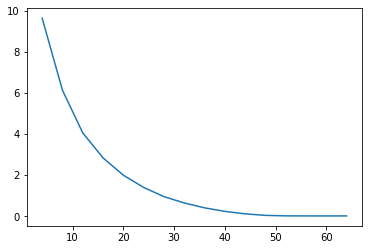

In [50]:
X, y = load_digits(return_X_y=True)
i = 64
err = []
indices = []
while i > 0:
    pca = decomposition.PCA(n_components=i)
    pca.fit(X)
    X_t = pca.transform(X)
    X_i = pca.inverse_transform(X_t)
    err.append(mean_squared_error(X, X_i))
    indices.append(i)
    i = i - 4
    
plt.plot(indices, err)

Наблюдается обратная зависимость между количеством компонент РСА и точностью восстановления картинки. При большем количестве компонент средняя ошибка стремится к нулю. 